# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
<br/>

[Matthew Esposito](mailto:EspositoMD1@cardiff.ac.uk)<br />
[Chuntong Huang](mailto:HuangC31@cardiff.ac.uk)<br />
[Matthew Jepson](mailto:JepsonMW@cardiff.ac.uk)<br />
[Guoyi Jia](mailto:JiaG@cardiff.ac.uk)<br /> 
[Zhicong Tang](mailto:TangZ19@cardiff.ac.uk)<br /> 
[Hekang Zhang](mailto:ZhangH120@cardiff.ac.uk)<br /> 
[Xiaoling Zhu](mailto:ZhuX41@cardiff.ac.uk)<br />
[Jose Mendoza](mailto:mendoza-jimenezjc@cardiff.ac.uk)<br />


<a class="anchor" id="index"></a>
# Contents
***
## [0. Import required modules](#0)
<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load ](#1_0)
### [1.1. Exploratory data analysis ](#1_1)
### [1.2. Data visualization ](#1_2)

<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>

### [2.1 Data pre-processing](#2_1)
### [2.2 Literature review](#2_2)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0. Import required modules
<a class="anchor" id="0"></a>
#### [Return to index](#main_title)
<br/>

Import required packages for each part of the coursework:


In [1]:
# General modules:
import numpy as np
import os
import random

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Data pre-processing
#from Collections import Counter, defaultdict

# Machine learning module
import tensorflow as tf
import keras


Using TensorFlow backend.


length x_train: 210 <class 'numpy.ndarray'>
length x_train[0] 30 <class 'numpy.ndarray'>
length x_train[0][0] 29 <class 'numpy.ndarray'>
contents from x_train[0][0] [[[ 75  78  80]
  [ 74  76  78]
  [ 86  87  84]
  ...
  [ 68  75  75]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 83  84  86]
  [ 80  80  82]
  [ 90  89  84]
  ...
  [ 73  77  78]
  [ 76  78  75]
  [ 80  80  78]]

 [[ 78  78  80]
  [ 86  85  86]
  [ 93  90  91]
  ...
  [ 72  74  72]
  [ 73  74  69]
  [ 78  78  74]]

 ...

 [[133 134 139]
  [122 127 132]
  [112 121 124]
  ...
  [ 94  94  89]
  [ 97  98  91]
  [ 99 103  99]]

 [[ 91  95  99]
  [ 91  98 103]
  [ 74  85  89]
  ...
  [103 101  95]
  [110 113 104]
  [ 96 104  98]]

 [[ 85  84  87]
  [ 95 101 107]
  [ 61  74  79]
  ...
  [102 102  95]
  [ 99 102  90]
  [ 90  97  89]]]


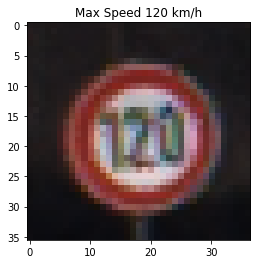

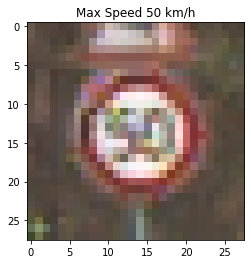

In [2]:
# Task modules:
from t0_module import x_train, y_train, x_test, y_test, class_names, train_dir, test_dir


***
# 1. Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0"></a>
#### [Return to index](#main_title)

In [3]:
train_df = pd.read_csv("data/Train.csv")
test_df = pd.read_csv("data/Test.csv")

train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
train_df['Area'] = train_df.Height * train_df.Width

train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Area
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,702
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,756
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,754
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,756
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,728


In [5]:
train_df_cat = train_df.groupby('ClassId').mean().sort_values(by='Area', ascending=True)


print(train_df_cat.head())

             Width     Height    Roi.X1    Roi.Y1     Roi.X2     Roi.Y2  \
ClassId                                                                   
17       38.010811  40.273874  5.518018  5.613514  32.844144  35.081982   
6        40.404762  42.126190  5.576190  5.595238  35.185714  36.850000   
42       41.145833  41.291667  5.558333  5.579167  35.870833  36.041667   
32       41.004167  41.425000  5.700000  5.670833  35.675000  36.058333   
5        42.515054  42.823656  5.663978  5.663978  37.225806  37.518817   

                Area  
ClassId               
17       1677.474775  
6        1881.604762  
42       1885.904167  
32       1968.908333  
5        2083.274194  


### Create a barplot to explore average picture area:

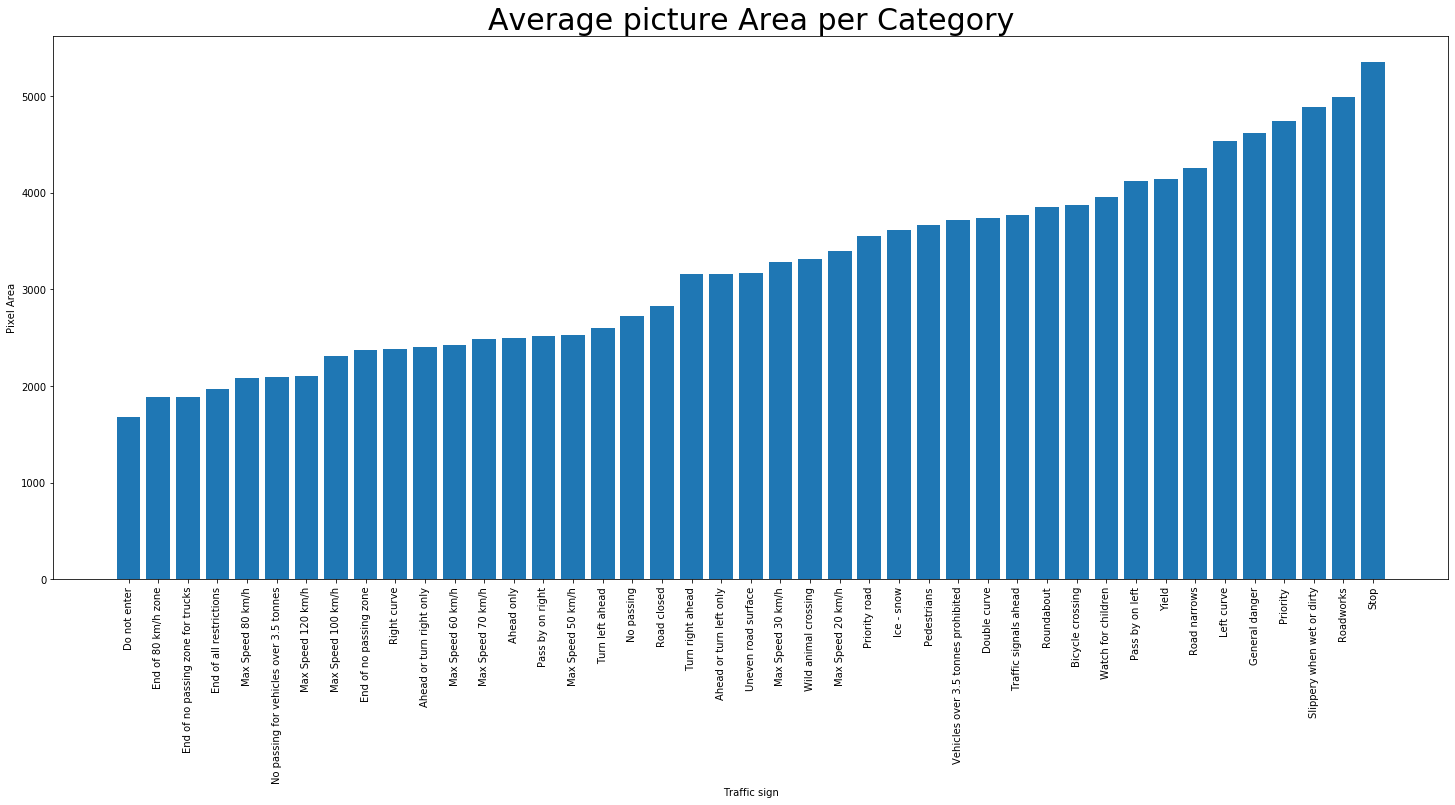

In [6]:
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

plt.bar(range(len(train_df_cat)), train_df_cat['Area'])
plt.title('Average picture Area per Category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Pixel Area')

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_xticks(range(len(train_df_cat)))
ax.set_xticklabels(labels, rotation = 90)

plt.show()

### Create a barplot to explore number of pictures per category:

In [7]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)


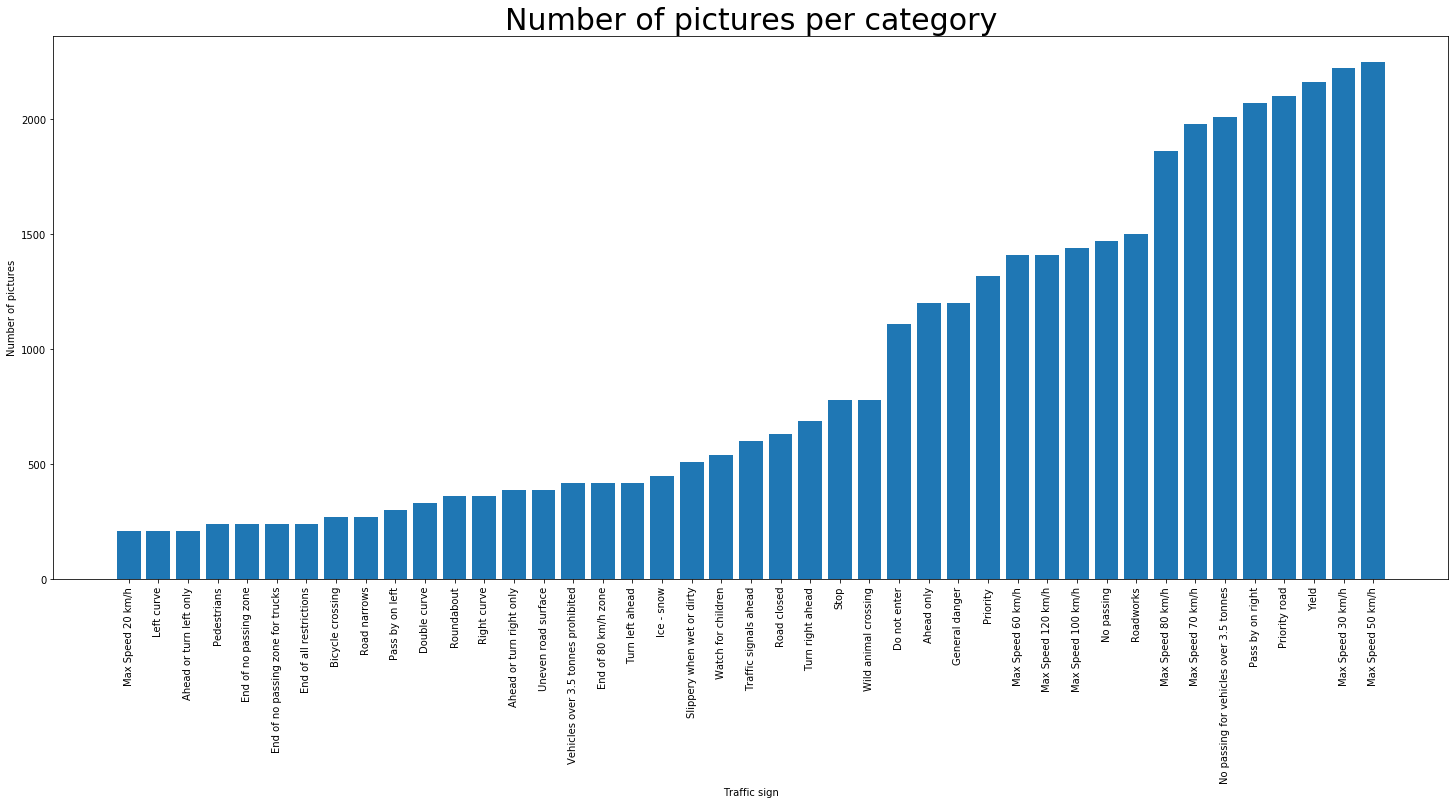

In [8]:
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

plt.bar(range(len(train_counts)), train_counts.values)
plt.title('Number of pictures per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Number of pictures')

labels = [ class_names[i] for i in train_counts.index ]
ax.set_xticks(range(len(train_counts)))
ax.set_xticklabels(labels, rotation = 90)

plt.show()

In [59]:
y_train

array(['Max Speed 20 km/h', 'Max Speed 20 km/h', 'Max Speed 20 km/h', ...,
       'End of no passing zone for trucks',
       'End of no passing zone for trucks',
       'End of no passing zone for trucks'], dtype='<U39')

In [9]:
print('x_train length: ', len(x_train) )
print('y_train length: ', len(y_train) )

pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train)), columns=['Picture avg', 'Category']  )

df_pixels


x_train length:  39209
y_train length:  39209


,Picture avg,Category
0,128.588506,Max Speed 20 km/h
1,129.371111,Max Speed 20 km/h
2,127.922593,Max Speed 20 km/h
3,126.164759,Max Speed 20 km/h
4,130.678125,Max Speed 20 km/h
...,...,...
39204,28.877976,End of no passing zone for trucks
39205,28.602422,End of no passing zone for trucks
39206,28.502966,End of no passing zone for trucks
39207,28.370217,End of no passing zone for trucks


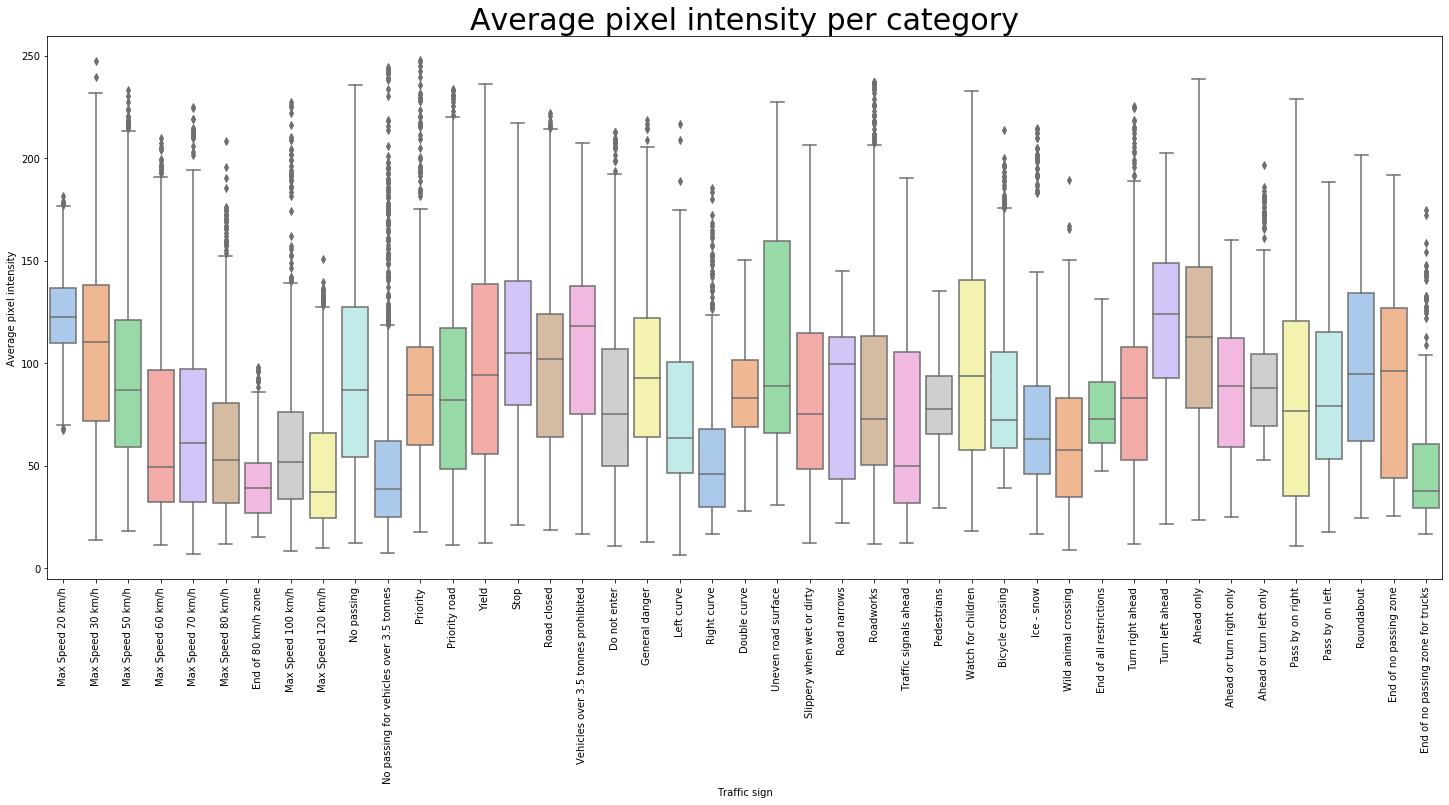

In [10]:
# box plot showing relationship between education and compenstation
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "pastel", data = df_pixels)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.show()

## Inspect 5 random pictures

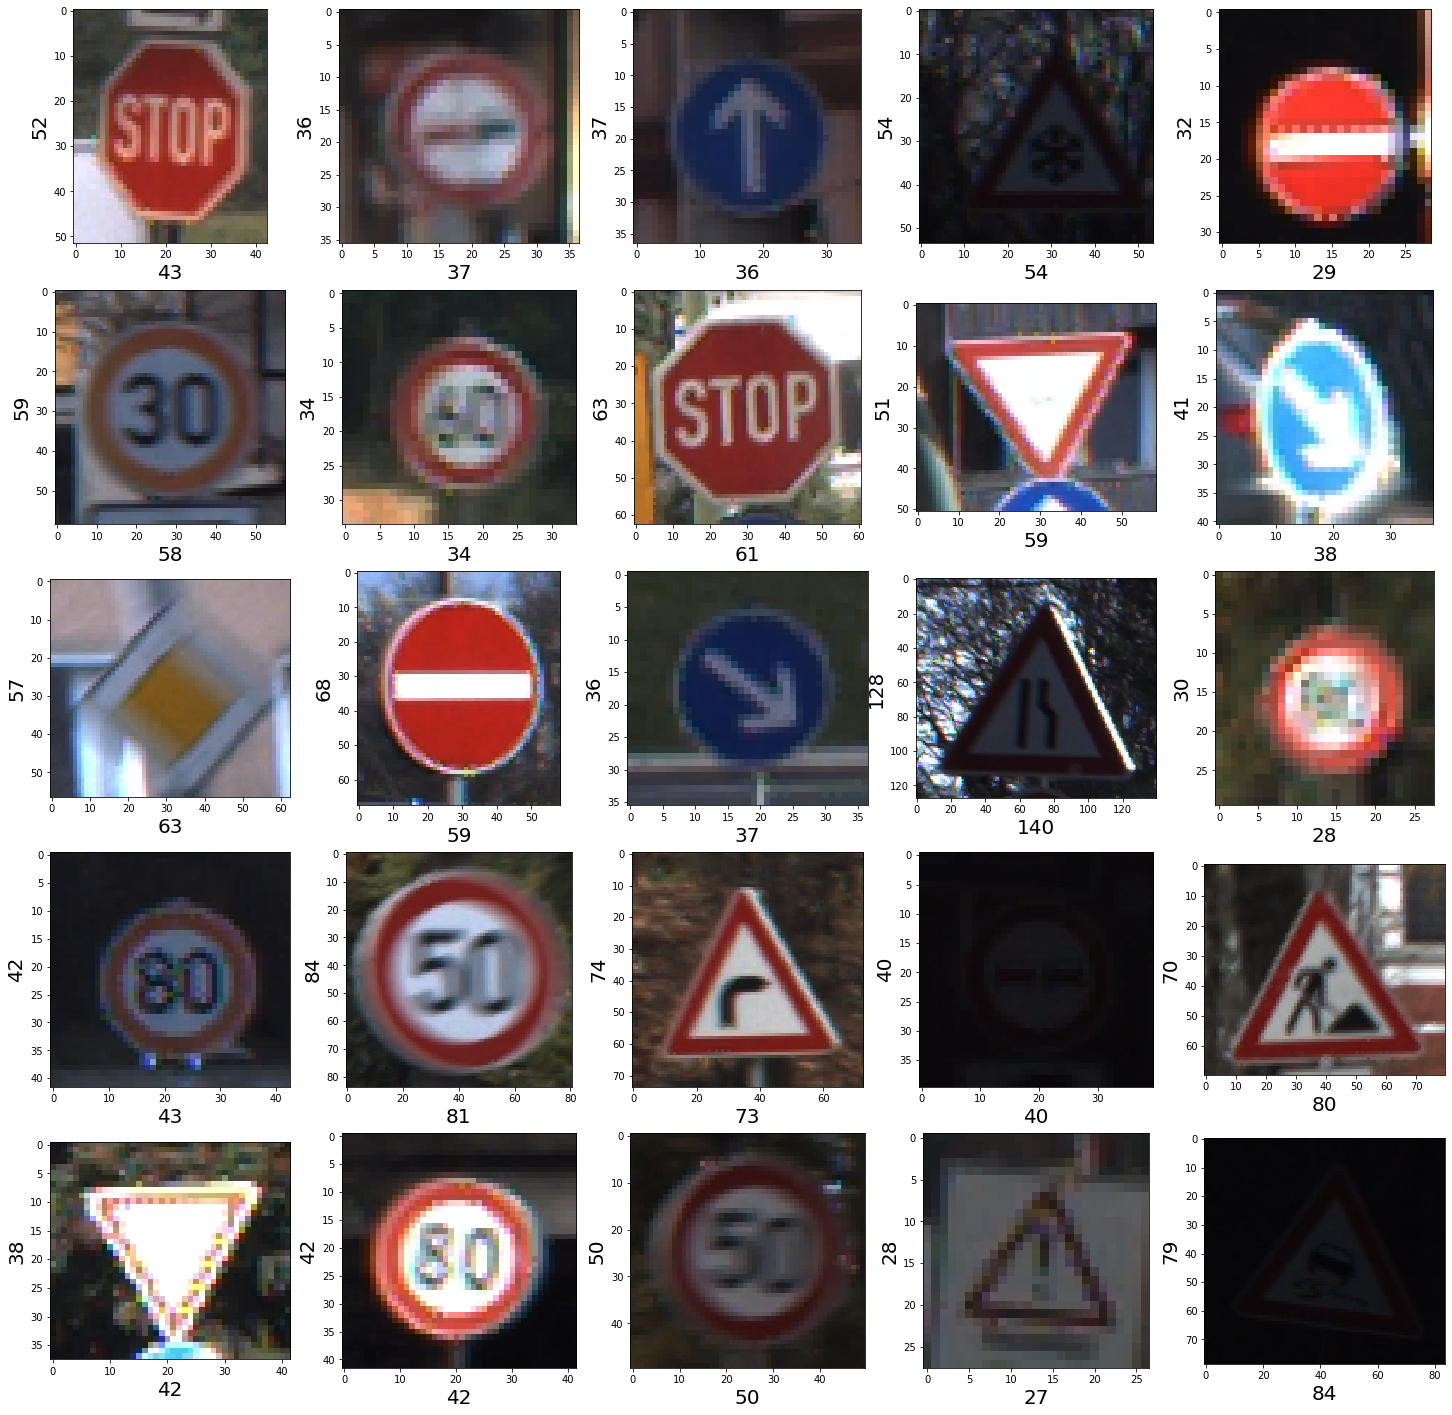

In [91]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
    

In [11]:
# Example

df_pixels.head()

df_20 = df_pixels[df_pixels.Category == "Max Speed 20 km/h"]
df_20.Category.unique()

array(['Max Speed 20 km/h'], dtype=object)

In [19]:
axes = []

for category in class_names:
    axes_name = str(category)+'_'+'ax'
    axes.append(axes_name)

axes

['Max Speed 20 km/h_ax',
 'Max Speed 30 km/h_ax',
 'Max Speed 50 km/h_ax',
 'Max Speed 60 km/h_ax',
 'Max Speed 70 km/h_ax',
 'Max Speed 80 km/h_ax',
 'End of 80 km/h zone_ax',
 'Max Speed 100 km/h_ax',
 'Max Speed 120 km/h_ax',
 'No passing_ax',
 'No passing for vehicles over 3.5 tonnes_ax',
 'Priority_ax',
 'Priority road_ax',
 'Yield_ax',
 'Stop_ax',
 'Road closed_ax',
 'Vehicles over 3.5 tonnes prohibited_ax',
 'Do not enter_ax',
 'General danger_ax',
 'Left curve_ax',
 'Right curve_ax',
 'Double curve_ax',
 'Uneven road surface_ax',
 'Slippery when wet or dirty_ax',
 'Road narrows_ax',
 'Roadworks_ax',
 'Traffic signals ahead_ax',
 'Pedestrians_ax',
 'Watch for children_ax',
 'Bicycle crossing_ax',
 'Ice - snow_ax',
 'Wild animal crossing_ax',
 'End of all restrictions_ax',
 'Turn right ahead_ax',
 'Turn left ahead_ax',
 'Ahead only_ax',
 'Ahead or turn right only_ax',
 'Ahead or turn left only_ax',
 'Pass by on right_ax',
 'Pass by on left_ax',
 'Roundabout_ax',
 'End of no passi

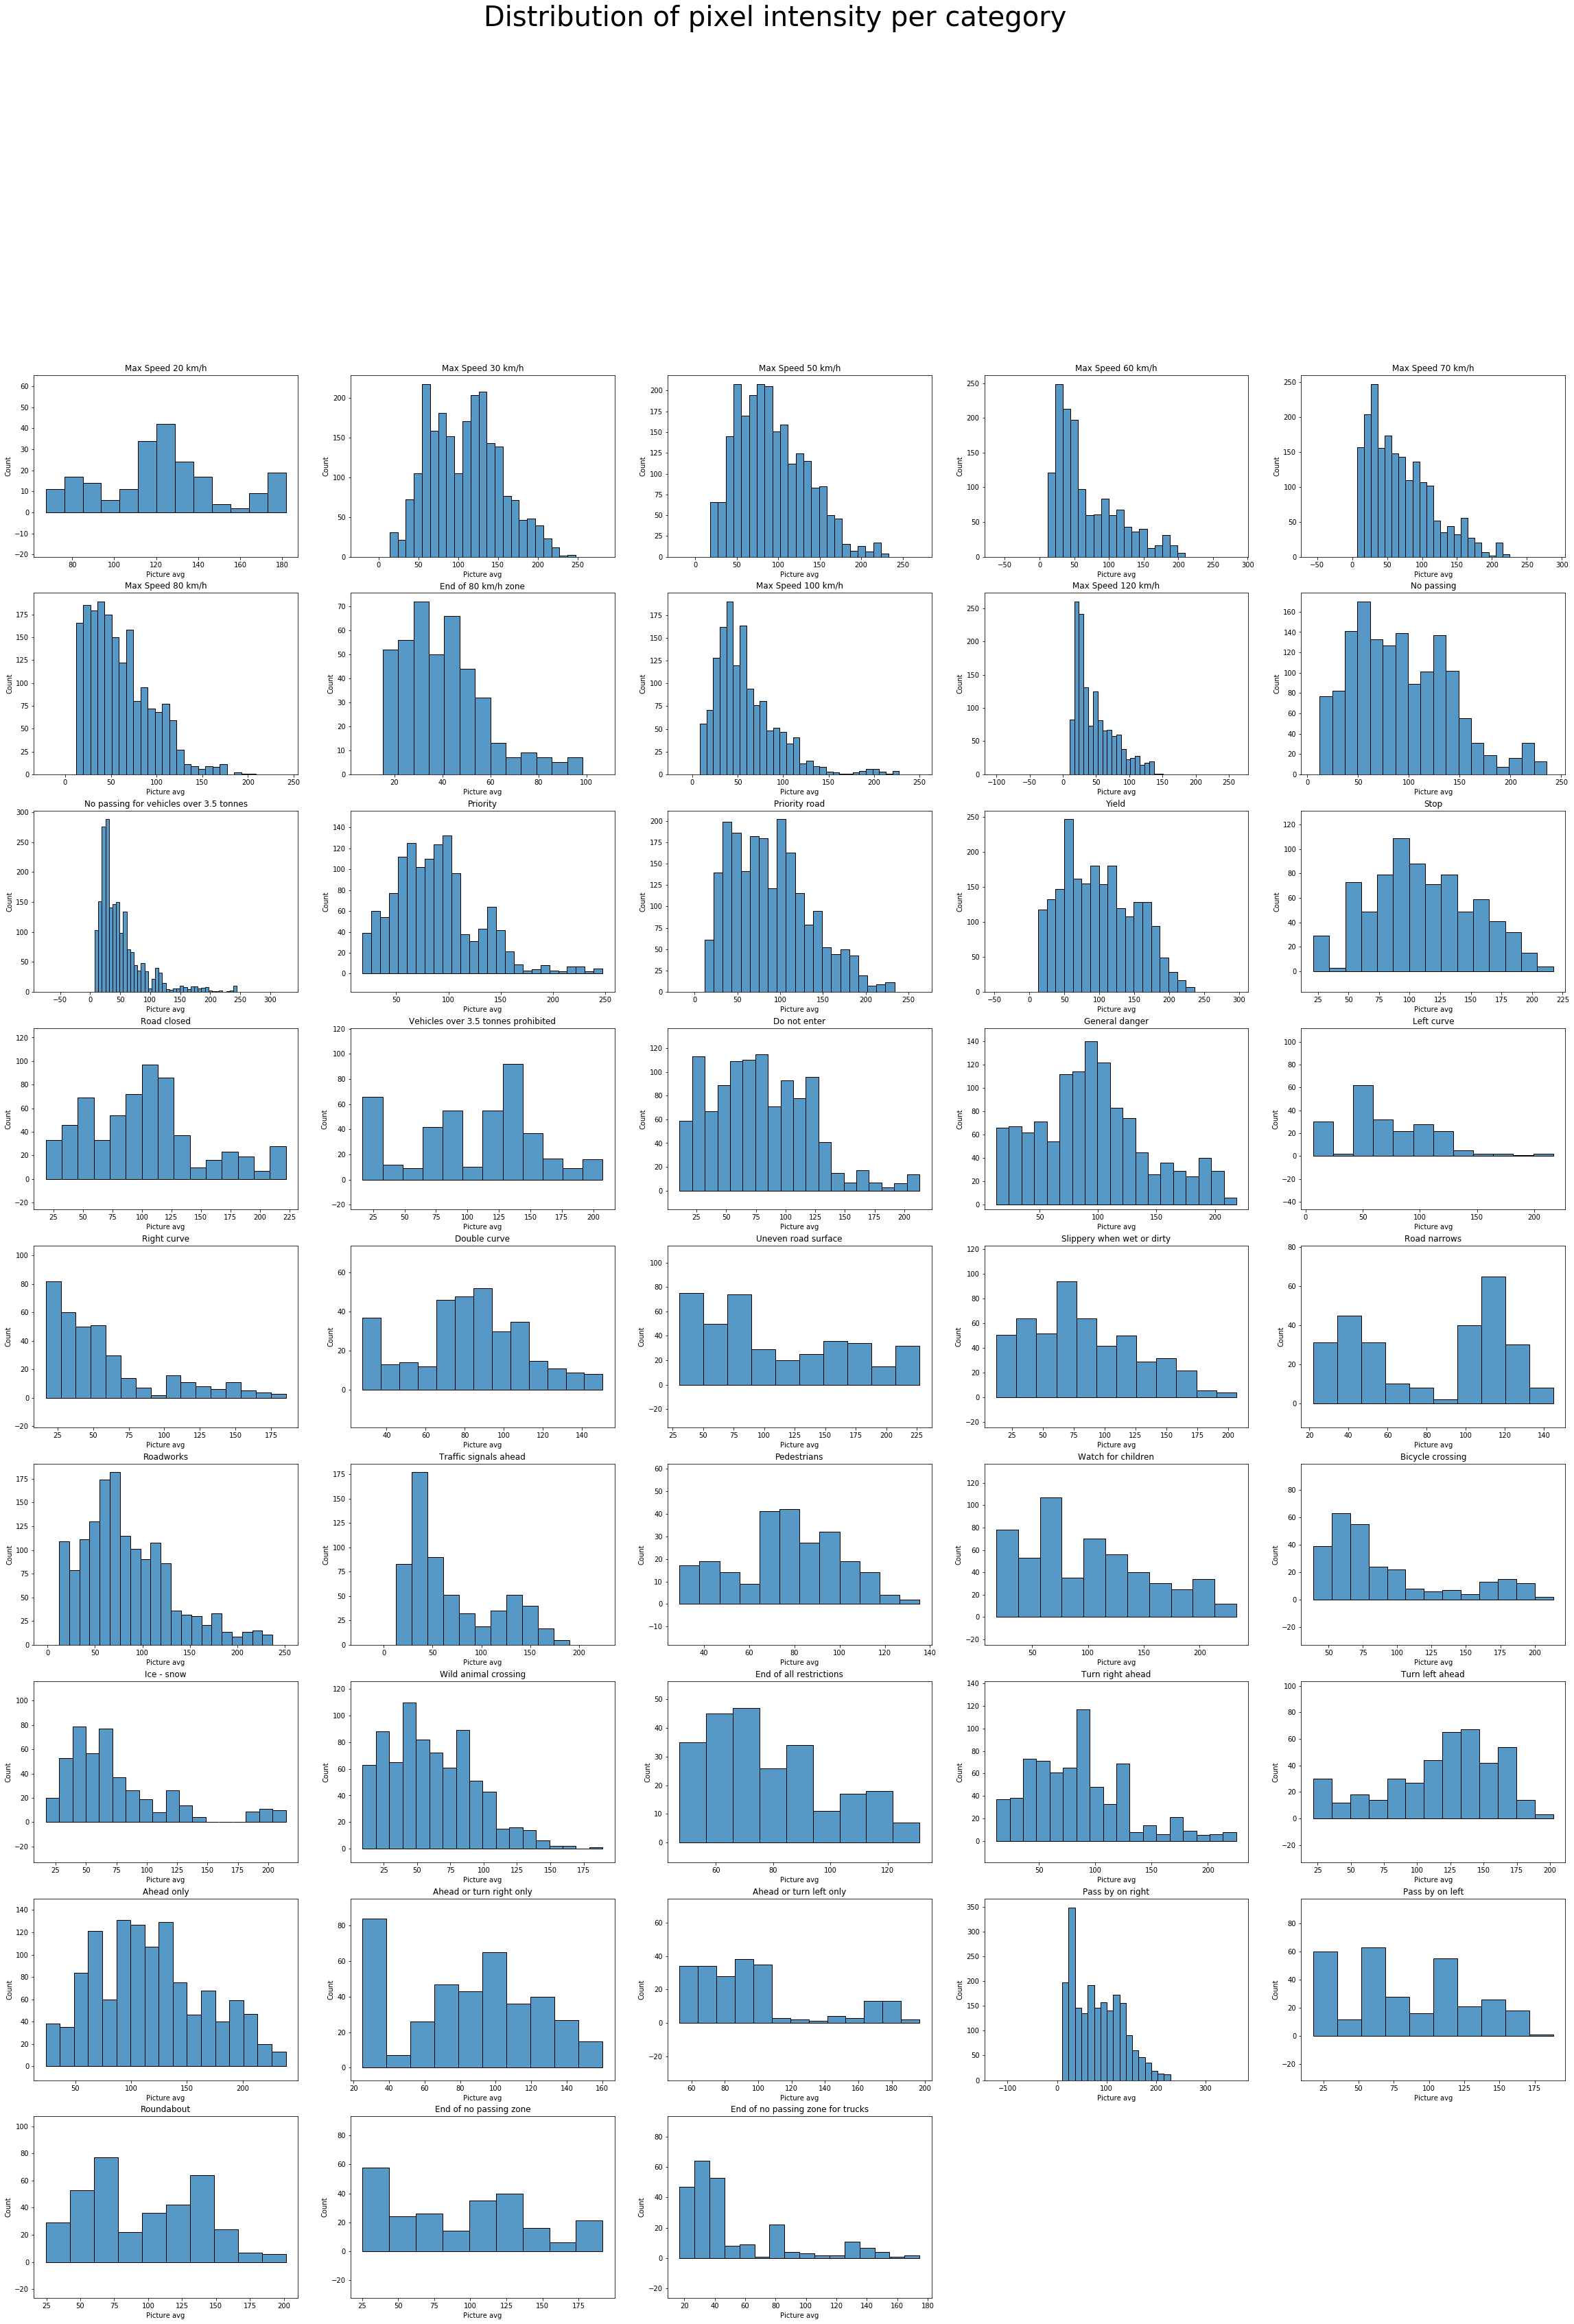

In [42]:
fig = plt.figure(figsize=(25,25))

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(len(class_names), 5 , i+1)
    
    
    fig.set_figheight(250)
    fig.set_figwidth(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    #axes[i].hist([values], bins = 10, facecolor = 'green')
    sns.histplot( df_pixels[df_pixels.Category == category]["Picture avg"])
    
    axes[i].set_ylim([25, 50])
    axes[i].axis('equal')

    
    axes[i].set_title(class_names[i])


fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 0.91)
    
plt.show()
    

    
    

## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Explore the number of files using .value_counts()





## 1.2 Data visualization 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)

In [ ]:
# Create a histogram with the number of pictures per category:





In [ ]:
# Create a box-plot with the average pixel intensity per picture:





In [ ]:
# Visualize 25 random pictures from the test dataset:





***
# 2. Preprocessing + Literature review 
<a class="anchor" id="2"></a>
#### [Return to index](#main_title)

## 2.1 Data pre-processing 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Resize all pictures: 
# Use pillow package (pip install PIL) then -> from PIL import Image . Use .fromarray() and .resize() methods to load and resize images.







In [ ]:
# Shuffle train pictures:






In [ ]:
# Split the train data into train and validation set:






In [ ]:
# One hot encoding the labels:






## 2.2 Literature Review 
<a class="anchor" id="2_2"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for the choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3. Implementation + results 
<a class="anchor" id="3"></a>
#### [Return to index](#main_title)

## 3.1 Model implementation 
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Create a CNN model:





### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Discuss CNN model and add more layers if neccesary:






## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2"></a>
#### [Return to index](#main_title)

In [ ]:
# Train the model:







## 3.3 Performance review
<a class="anchor" id="3_3"></a>
#### [Return to index](#main_title)

In [ ]:
# Plot accuracy vs loss performance and discuss the need of data augmentation:




